# General Analysis of Segmentation Architectures Performance

This notebook aims to compare quantitatively the performance of nnU-Net, Stardist and Cellstitch models with regard to accuracy, precision, recall, IoU and ratio of predicted and ground truth masks.

In [2]:
import ipywidgets as widgets
from glob import glob
import os
import numpy as np
import copy
import nibabel as nib
import matplotlib.pyplot as plt
import matplotlib as mpl
import tifffile
import seaborn as sns
import warnings
import json 
import pickle
import pandas as pd
from glob import glob
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import Graphics

os.chdir("/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/Pipeline-for-Morphology-Labeling/")
from Main.Analysis import consecutive_labels
from Main.GetImage import getData, getMetadata

os.chdir("/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/Pipeline-for-Morphology-Labeling/Notebooks/")

warnings. filterwarnings('ignore')

In [5]:
# Set palettes
sns.color_palette('rocket')
mpl.rc('image', cmap='rocket')

# Set colors
palette = Graphics.palette()
# bars_palette = sns.color_palette('crest')
bars_palette = sns.color_palette("rocket")

## Define base colors for cool sage, soft gold, and coral rose
cool_sage = "#9CAF88"
soft_gold = "#D4AF37"
coral_rose = "#E76F51"
white = "#FFFFFF"
## Create an expanded palette using Seaborn's blend_palette for smooth gradients
markers_palette = sns.color_palette(sns.blend_palette([cool_sage, soft_gold, coral_rose], n_colors=9))

In [6]:
# Path for the algorithms locations
path = "/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/algorithms_segmentation"

## Subdirectories for nnUNet, stardist and cellpose
nnUNet_path = path + "/nnU-Net"
stardist_path = path + "/Stardist"
cellstitch_path = path + "/CellStitch"

In [7]:
def dropdown(path, value=0):
    ls = list(map(os.path.basename, sorted(glob(path))))
    ## Dropdown widget to select fold of interest
    dropdown = widgets.Dropdown(options=ls, value=ls[value])
    display(dropdown)

    return dropdown

## Data loading and Visualization

### nnU-Net images

In [5]:
# Select dataset
nnUNet_dataset_path = f"{nnUNet_path}/nnUNet_results/*"
nnUNet_dataset = dropdown(nnUNet_dataset_path, 1)

IndexError: list index out of range

In [ ]:
# Select fold
nnUNet_fold_path = f"{nnUNet_path}/nnUNet_results/{nnUNet_dataset.value}/nnUNetTrainer__nnUNetResEncUNetMPlans__3d_fullres/fold*"
nnUNet_folds = dropdown(nnUNet_fold_path)

Dropdown(options=('fold_0', 'fold_1', 'fold_2', 'fold_3', 'fold_4', 'fold_all'), value='fold_0')

In [ ]:
# Select tested image
nnUNet_images_path = f"{nnUNet_path}/nnUNet_results/{nnUNet_dataset.value}/nnUNetTrainer__nnUNetResEncUNetMPlans__3d_fullres/{nnUNet_folds.value}/validation/*.gz"
nnUNet_images = dropdown(nnUNet_images_path)

Dropdown(options=('INTRO001.nii.gz', 'INTRO008.nii.gz', 'INTRO009.nii.gz', 'INTRO012.nii.gz'), value='INTRO001…

In [ ]:
# Loading of predicted, testing and groundtruth images

## Paths to images: predicted, testing and groundtruth images
pred_image_path = f"{nnUNet_path}/nnUNet_results/{nnUNet_dataset.value}/nnUNetTrainer__nnUNetResEncUNetMPlans__3d_fullres/{nnUNet_folds.value}/validation/{nnUNet_images.value}"
test_image_path = f"{nnUNet_path}/nnUNet_raw/Dataset001_ThomasActinGFP/imagesTr/{nnUNet_images.value.split('.')[0]}_0000.tif"
groundtruth_path = f"{nnUNet_path}/nnUNet_raw/{nnUNet_dataset.value}/labelsIns/{nnUNet_images.value.split('.')[0]}.tif"

## Loading images
pred_nnUNet = consecutive_labels(getData(pred_image_path))
test = getData(test_image_path)
groudtruth = consecutive_labels(getData(groundtruth_path))

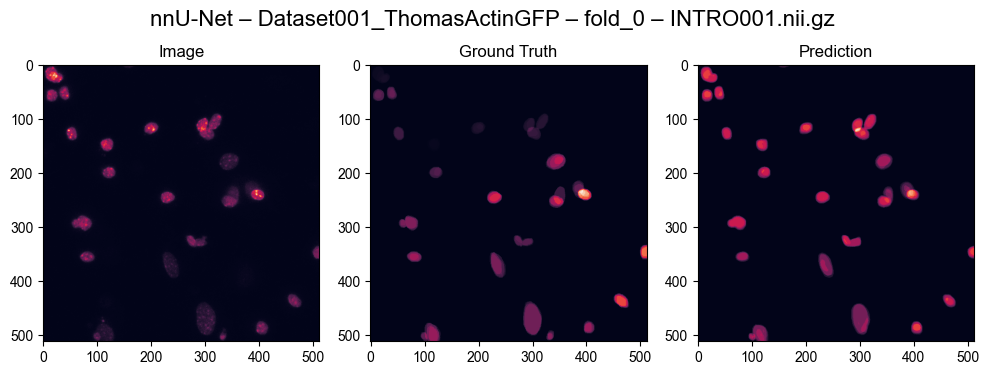

In [ ]:
# Graphical visualization of predicted, testing and groundtruth images
fig, axs = plt.subplots(1, 3, figsize=(10,5))
fig.suptitle(f"nnU-Net – {nnUNet_dataset.value} – {nnUNet_folds.value} – {nnUNet_images.value}", fontsize=16)

## Plot test image
axs[0].imshow(test.sum(axis=0))
axs[0].set_title("Image")

## Plot groudtruth image
axs[1].imshow(groudtruth.sum(axis=0))
axs[1].set_title("Ground Truth")

## Plot predicted image
axs[2].imshow(pred_nnUNet.transpose((1,2,0)).sum(axis=1))
axs[2].set_title("Prediction")

## Titles and axis
fig.tight_layout()
fig.subplots_adjust(top=1.15)

## Show
plt.show()

### Stardist images

In [ ]:
# Select fold

stardist_fold_path = f"{stardist_path}/data/fold*"
stardist_folds = dropdown(stardist_fold_path)

Dropdown(options=('fold_0', 'fold_1', 'fold_2', 'fold_3', 'fold_4', 'fold_all'), value='fold_0')

In [ ]:
# Select tested image

stardist_images_path = f"{stardist_path}/data/{stardist_folds.value}/results/*.tif"
stardist_images = dropdown(stardist_images_path)

Dropdown(options=('INTRO001.tif', 'INTRO008.tif', 'INTRO009.tif', 'INTRO012.tif'), value='INTRO001.tif')

In [ ]:
# Loading of predicted, testing and groundtruth images

## Paths to images: predicted, testing and groundtruth images
pred_image_path = f"{stardist_path}/data/{stardist_folds.value}/results/{stardist_images.value}"
test_image_path = f"{stardist_path}/data/{stardist_folds.value}/test/images/{stardist_images.value}"
groundtruth_path = f"{stardist_path}/data/{stardist_folds.value}/test/masks/{stardist_images.value}"

## Loading images
pred_stardist = consecutive_labels(getData(pred_image_path))
test = getData(test_image_path)
groudtruth = consecutive_labels(getData(groundtruth_path))

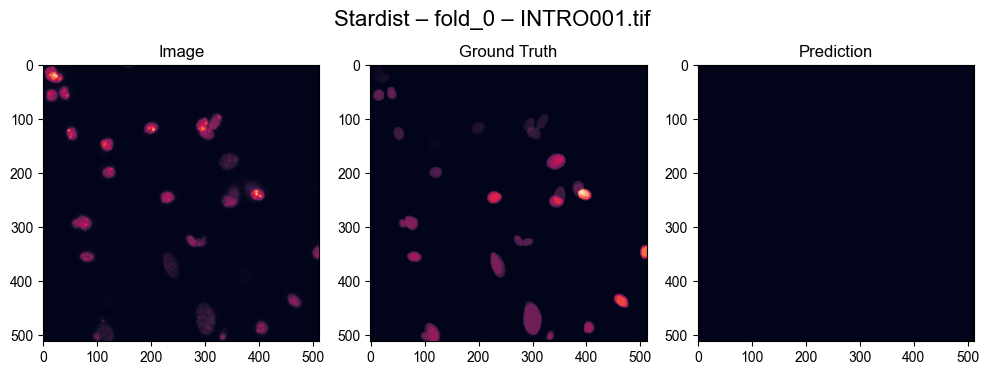

In [ ]:
# Graphical visualization of predicted, testing and groundtruth images
fig, axs = plt.subplots(1, 3, figsize=(10,5))
fig.suptitle(f"Stardist – {stardist_folds.value} – {stardist_images.value}", fontsize=16)

## Plot test image
axs[0].imshow(test.sum(axis=0))
axs[0].set_title("Image")

## Plot groundtruth image
axs[1].imshow(groudtruth.sum(axis=0))
axs[1].set_title("Ground Truth")

## Plot predicted image
axs[2].imshow(pred_stardist.sum(axis=0))
axs[2].set_title("Prediction")

## Titles and axis
fig.tight_layout()
fig.subplots_adjust(top=1.15)

#Show image
plt.show()

### CellStitch images

In [ ]:
# Select fold

cellstitch_fold_path = f"{cellstitch_path}/data/ActinGFP/essay*"
cellstitch_folds = dropdown(cellstitch_fold_path, 1)

Dropdown(index=1, options=('essay_cyto2_7030_lr0002_e100_b2_237', 'essay_cyto2_7030_lr0002_e100_b2_440', 'essa…

In [ ]:
# Select images

cellstitch_images_path = f"{cellstitch_path}/data/ActinGFP/{cellstitch_folds.value}/results/cellstitch/*.npy"
cellstitch_images = dropdown(cellstitch_images_path)

Dropdown(options=('INTRO001.npy', 'INTRO005.npy', 'INTRO006.npy', 'INTRO009.npy', 'INTRO010.npy'), value='INTR…

In [ ]:
# Loading of predicted, testing and groundtruth images

## Paths to images: predicted, testing and groundtruth images
pred_cst_image_path = f"{cellstitch_path}/data/ActinGFP/{cellstitch_folds.value}/results/cellstitch/{cellstitch_images.value}"
pred_c2d_image_path = f"{cellstitch_path}/data/ActinGFP/{cellstitch_folds.value}/results/cellpose2d/{cellstitch_images.value}"
pred_c3d_image_path = f"{cellstitch_path}/data/ActinGFP/{cellstitch_folds.value}/results/cellpose3d/{cellstitch_images.value}"
test_image_path = f"{stardist_path}/data/fold_all/test/images/{cellstitch_images.value[:-4]}.tif"
groundtruth_path = f"{stardist_path}/data/fold_all/test/masks/{cellstitch_images.value[:-4]}.tif"

## Loading images
pred_cst = consecutive_labels(np.load(pred_cst_image_path))
pred_c2d = consecutive_labels(np.load(pred_c2d_image_path))
pred_c3d = consecutive_labels(np.load(pred_c3d_image_path))
test = getData(test_image_path)
groudtruth = consecutive_labels(getData(groundtruth_path))

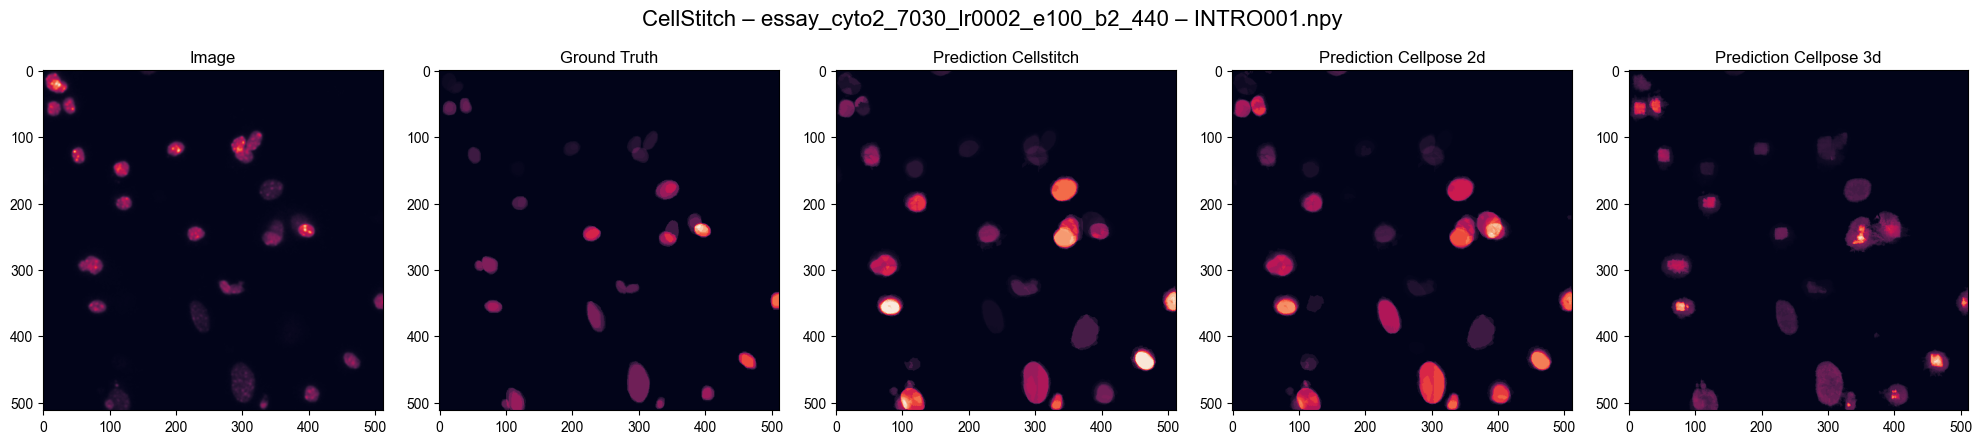

In [ ]:
# Graphical visualization of predicted, testing and groundtruth images

fig, axs = plt.subplots(1, 5, figsize=(20,5))
fig.suptitle(f"CellStitch – {cellstitch_folds.value} – {cellstitch_images.value}", fontsize=16)

## Plot test image
axs[0].imshow(test.sum(axis=0))
axs[0].set_title("Image")

## Plot groudtruth image
axs[1].imshow(groudtruth.sum(axis=0))
axs[1].set_title("Ground Truth")

## Plot predicted cellstitch image
axs[2].imshow(pred_cst.sum(axis=0))
axs[2].set_title("Prediction Cellstitch")

## Plot predicted cellpose 2D image
axs[3].imshow(pred_c2d.sum(axis=0))
axs[3].set_title("Prediction Cellpose 2d")

## Plot predicted cellpose 3D image
axs[4].imshow(pred_c3d.sum(axis=0))
axs[4].set_title("Prediction Cellpose 3d")

## Titles and axis
fig.tight_layout()
fig.subplots_adjust(top=1)

## Show
plt.show()

### Overview

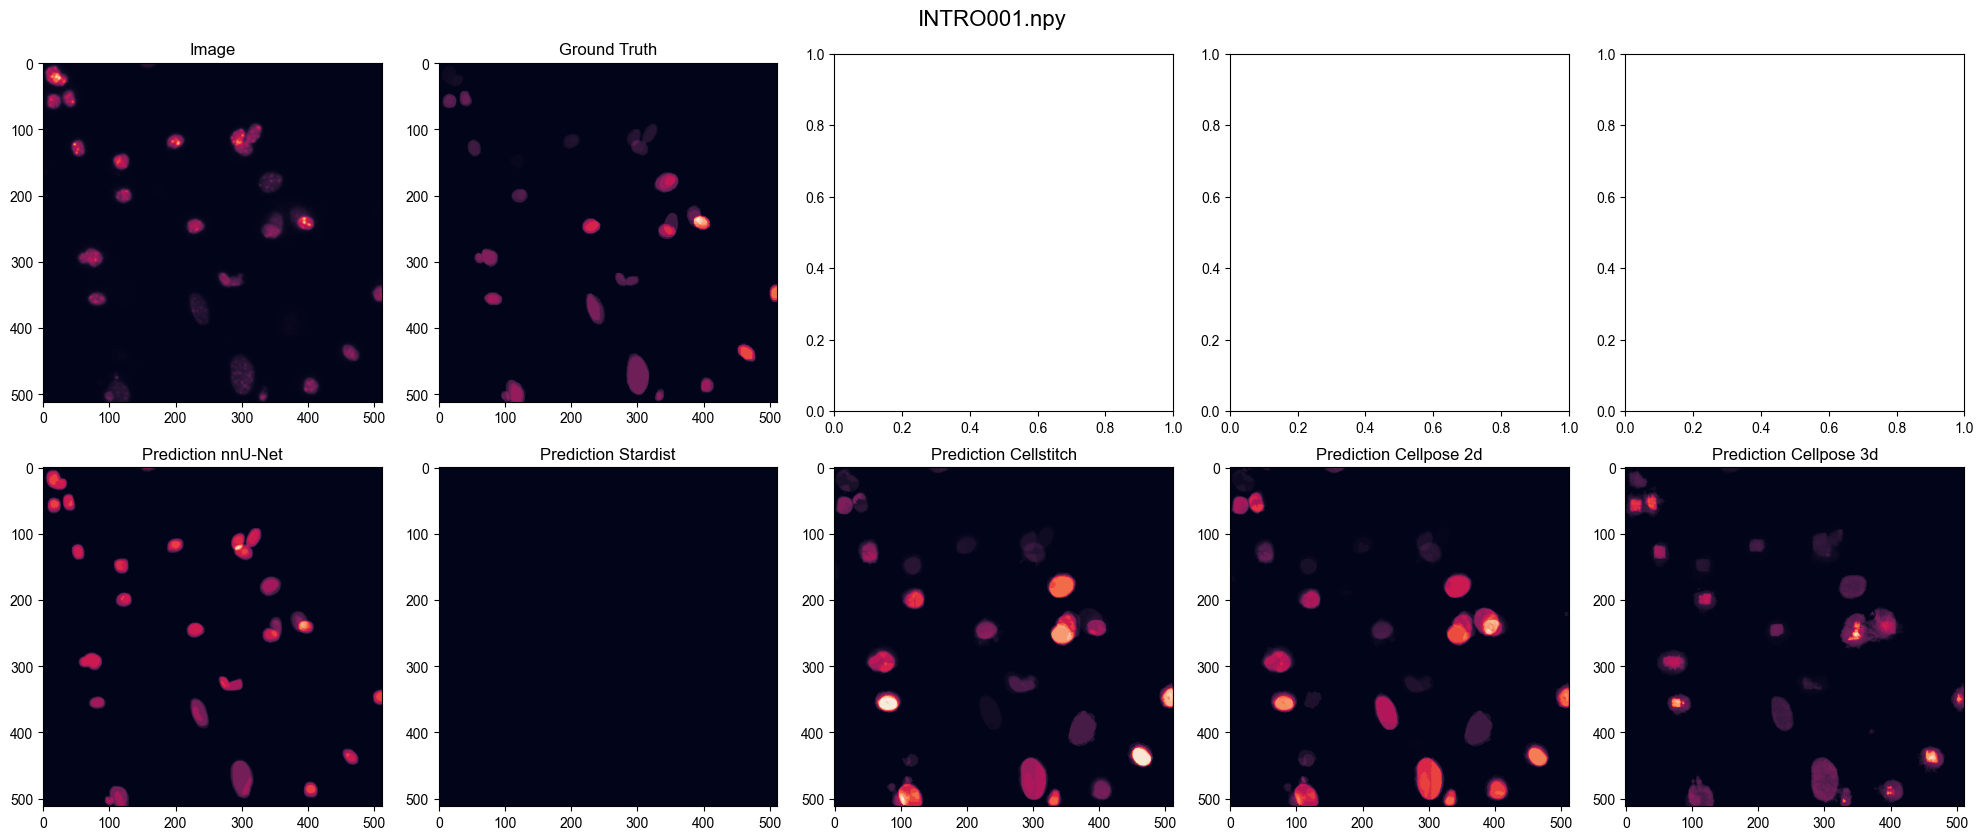

In [ ]:
# Graphical visualization of predicted, testing and groundtruth images of all architectures

fig, axs = plt.subplots(2, 5, figsize=(20,8.5))
fig.suptitle(f"{cellstitch_images.value}", fontsize=16)

## Plot test image
axs[0,0].imshow(test.sum(axis=0))
axs[0,0].set_title("Image")

## Plot groudtruth image
axs[0,1].imshow(groudtruth.sum(axis=0))
axs[0,1].set_title("Ground Truth")

## Plot predicted nnUNet image
axs[1,0].imshow(pred_nnUNet.transpose((1,2,0)).sum(axis=1))
axs[1,0].set_title("Prediction nnU-Net")

## Plot predicted Stardist image
axs[1,1].imshow(pred_stardist.sum(axis=0))
axs[1,1].set_title("Prediction Stardist")

## Plot predicted Cellstitch image
axs[1,2].imshow(pred_cst.sum(axis=0))
axs[1,2].set_title("Prediction Cellstitch")

## Plot predicted Cellpose2D image
axs[1,3].imshow(pred_c2d.sum(axis=0))
axs[1,3].set_title("Prediction Cellpose 2d")

## Plot predicted Cellpose3D image
axs[1,4].imshow(pred_c3d.sum(axis=0))
axs[1,4].set_title("Prediction Cellpose 3d")

fig.tight_layout()

plt.show()

## Analysis

In [8]:
# Load segemntation data analysis paths

## nnU-Net paths
nnUNet_analysis_paths = sorted([f"{res_path}/nnUNetTrainer__nnUNetResEncUNetMPlans__3d_fullres/analysis/fold*/*.pkl" 
                                for res_path in glob(f"{nnUNet_path}/nnUNet_results/*")
                                if os.path.exists(f"{res_path}/nnUNetTrainer__nnUNetResEncUNetMPlans__3d_fullres/analysis/")])

## Stardist path
stardist_analysis_path = f"{stardist_path}/data/analysis/fold*/*.pkl"

## Cellpos paths
cellpose_analysis_paths = sorted([f"{cellstitch_path}/data/ActinGFP/analysis/*/cellstitch/*.pkl",
                                  f"{cellstitch_path}/data/ActinGFP/analysis/*/cellpose2d/*.pkl",
                                  f"{cellstitch_path}/data/ActinGFP/analysis/*/cellpose3d/*.pkl"])

## List with all architectures paths
architectures_analysis_paths = nnUNet_analysis_paths + [stardist_analysis_path] + cellpose_analysis_paths

In [9]:
num_gt = dict()

for path in glob(nnUNet_analysis_paths[0]):
    fold = path.split('/')[-2]
    with open(path, 'rb') as f:
        data = pickle.load(f)

    num_gt[data['name'].split('_')[1]] = data['masks_analysis']['groudtruth']

num_gt

num_gt['017'] = num_gt['001'] + num_gt['002'] + num_gt['003'] + num_gt['004']
num_gt['018'] = num_gt['005'] + num_gt['006'] + num_gt['007'] + num_gt['008']
num_gt['019'] = num_gt['009'] + num_gt['010'] + num_gt['011'] + num_gt['012']
num_gt['020'] = num_gt['013'] + num_gt['014'] + num_gt['015'] + num_gt['016']

In [44]:
# Dataframe of models performance metrics

## Allocate dataframe
df_architectures_analysis = pd.DataFrame(columns=['architecture', 'dataset', 'fold', 'merge', 'name', 'ratio', 'recall', 'precision', 'map', 'iou', 'f1score', 'aglomerated'])

## Extract data from analysis
for analysis_path in architectures_analysis_paths:
    architecture = analysis_path.split('/')[8]
    for path in glob(analysis_path):
        fold = path.split('/')[-2]
        with open(path, 'rb') as f:
            data = pickle.load(f)

            name = data['name']
            dataset = data['dataset']

            ratio = data['masks_analysis']['ratio']
            iou = data['iou']['mean_iou']

            tp = data['metrics']['true_positives']
            fp = data['metrics']['false_positives']
            fn = data['metrics']['false_negatives']

            total_aglomerated_preds = 0
            if data['metrics']['overpredictions'] is not None and data['metrics']['overpredictions']['count'] is not None:
                total_aglomerated_preds = sum(
                    int(count) * data['metrics']['overpredictions']['count'][count] 
                    for count in data['metrics']['overpredictions']['count'].keys()
                )

            if tp > 0:
                mAP = tp/(tp+fn+fp)
                precision = tp/(tp+fp)
                recall = tp/(tp+fn)
                f1score = 2*tp/(2*tp+fn+fp)
            else:
                mAP = None
                precision = None
                recall = None
                f1score = None

            df_architectures_analysis.loc[len(df_architectures_analysis)] = [architecture, dataset, fold, None, name, ratio, recall, precision, mAP, iou, f1score, total_aglomerated_preds]

df_architectures_analysis = df_architectures_analysis.fillna(0)

nnU-Net
nnU-Net
nnU-Net
nnU-Net
nnU-Net
Stardist
CellStitch
CellStitch
CellStitch


In [49]:
df_architectures_analysis

,architecture,dataset,fold,merge,name,ratio,recall,precision,map,iou,f1score,aglomerated
0,nnU-Net,Dataset001_ActinGFP,fold_4,0,INTRO_006,0.849057,0.750000,0.729730,0.586957,0.520816,0.739726,21
1,nnU-Net,Dataset001_ActinGFP,fold_4,0,INTRO_003,0.950000,0.937500,0.882353,0.833333,0.685408,0.909091,4
2,nnU-Net,Dataset001_ActinGFP,fold_4,0,INTRO_014,0.761194,0.604651,0.666667,0.464286,0.565610,0.634146,24
3,nnU-Net,Dataset001_ActinGFP,fold_3,0,INTRO_010,0.835616,0.740741,0.769231,0.606061,0.593904,0.754717,19
4,nnU-Net,Dataset001_ActinGFP,fold_3,0,INTRO_005,1.046512,0.942857,0.804878,0.767442,0.686291,0.868421,8
...,...,...,...,...,...,...,...,...,...,...,...,...
555,CellStitch,ActinGFP,cellstitch,0,image_007_nuclei3d,1.268657,0.711538,0.528571,0.435294,0.202807,0.606557,36
556,CellStitch,ActinGFP,cellstitch,0,image_012_nuclei3d,1.685714,0.565217,0.386139,0.297710,0.134856,0.458824,45
557,CellStitch,ActinGFP,cellstitch,0,image_016_nuclei3d,2.000000,0.533333,0.280702,0.225352,0.157025,0.367816,30
558,CellStitch,ActinGFP,cellstitch,0,image_003_nuclei3d,2.200000,0.473684,0.236842,0.187500,0.143921,0.315789,12


In [16]:
# Save dataframe

## Create path to save data
generated_data_path = "/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/Pipeline-for-Morphology-Labeling/Notebooks/Data"
if not os.path.exists(generated_data_path):
    os.makedirs(generated_data_path)

    ## Save dataframe
    df_architectures_analysis.to_csv(f"{generated_data_path}/architectures_summary.csv")



In [10]:
df_architectures_analysis = pd.read_csv("/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/Pipeline-for-Morphology-Labeling/Notebooks/Data/architectures_summary.csv")
df_architectures_analysis

,Unnamed: 0,architecture,dataset,fold,merge,name,ratio,recall,precision,map,iou,f1score,aglomerated
0,0,nnU-Net,Dataset001_ActinGFP,fold_4,0,INTRO_006,0.849057,0.750000,0.729730,0.586957,0.520816,0.739726,21
1,1,nnU-Net,Dataset001_ActinGFP,fold_4,0,INTRO_003,0.950000,0.937500,0.882353,0.833333,0.685408,0.909091,4
2,2,nnU-Net,Dataset001_ActinGFP,fold_4,0,INTRO_014,0.761194,0.604651,0.666667,0.464286,0.565610,0.634146,24
3,3,nnU-Net,Dataset001_ActinGFP,fold_3,0,INTRO_010,0.835616,0.740741,0.769231,0.606061,0.593904,0.754717,19
4,4,nnU-Net,Dataset001_ActinGFP,fold_3,0,INTRO_005,1.046512,0.942857,0.804878,0.767442,0.686291,0.868421,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,555,CellStitch,ActinGFP,cellstitch,0,image_007_nuclei3d,1.268657,0.711538,0.528571,0.435294,0.202807,0.606557,36
556,556,CellStitch,ActinGFP,cellstitch,0,image_012_nuclei3d,1.685714,0.565217,0.386139,0.297710,0.134856,0.458824,45
557,557,CellStitch,ActinGFP,cellstitch,0,image_016_nuclei3d,2.000000,0.533333,0.280702,0.225352,0.157025,0.367816,30
558,558,CellStitch,ActinGFP,cellstitch,0,image_003_nuclei3d,2.200000,0.473684,0.236842,0.187500,0.143921,0.315789,12


In [11]:
nums = ["{:03}".format(n) for n in np.arange(1,21,1)]

ls = []

for name in df_architectures_analysis['name']:
    for num in nums:
        if num in name: ls.append(num_gt[num])
    
    # else:
    #     print(name)
    #     num = "{:03}".format(int(name.split('_')[0][2:]))
    #     ls.append(num_gt[num])

len(ls)
# [name for name in df_architectures_analysis['name']]

560

In [12]:
df_architectures_analysis['# GT'] = ls
df_architectures_analysis['perc aglomerated'] = df_architectures_analysis['aglomerated']/df_architectures_analysis['# GT']
df_architectures_analysis.replace([np.inf, -np.inf], 0, inplace=True)

In [13]:
df_architectures_analysis['dataset'].unique()

array(['Dataset001_ActinGFP', 'Dataset002_ActinGFP', 'Dataset003_DAPI',
       'Dataset004_Augmented', 'Dataset005_Zoomed', 'ActinGFP'],
      dtype=object)

In [14]:
df_architectures_analysis['fold'].unique()

array(['fold_4', 'fold_3', 'fold_2', 'fold_all', 'fold_0', 'fold_1',
       'cellpose2d', 'cellpose3d', 'cellstitch'], dtype=object)

In [18]:
# Create dataframe excluding training with all testing images
df_architectures_analysis_excALL = df_architectures_analysis[df_architectures_analysis['fold'] != 'fold_all']
df_architectures_0 = df_architectures_analysis_excALL[df_architectures_analysis_excALL['dataset'].isin(['Dataset001_ActinGFP', 'ActinGFP'])]

In [19]:
df_architectures_0.groupby("architecture").mean(numeric_only=True).apply(lambda x:x)


,Unnamed: 0,merge,ratio,recall,precision,map,iou,f1score,aglomerated,# GT,perc aglomerated
architecture,,,,,,,,,,,
CellStitch,466.0,0.0,3.121915,0.489046,0.227999,0.188544,0.175250,0.302404,16.951872,57.251337,0.302132
Stardist,355.5,0.0,0.650292,0.541216,0.626448,0.477752,0.406008,0.579751,10.375000,54.812500,0.190920
nnU-Net,14.5,0.0,0.894076,0.808968,0.799202,0.677148,0.633444,0.803042,12.625000,54.812500,0.226504


In [20]:
df_architectures_0.groupby("architecture").std(numeric_only=True).apply(lambda x:x)

,Unnamed: 0,merge,ratio,recall,precision,map,iou,f1score,aglomerated,# GT,perc aglomerated
architecture,,,,,,,,,,,
CellStitch,54.126395,0.0,1.226088,0.130164,0.139356,0.117287,0.042797,0.152509,14.047264,16.216145,0.234392
Stardist,12.532624,0.0,0.393612,0.334840,0.377090,0.300544,0.253625,0.353114,9.858161,18.214349,0.158515
nnU-Net,12.532624,0.0,0.076133,0.097119,0.065108,0.104513,0.050376,0.076466,6.163062,18.214349,0.078185


In [21]:
import pandas as pd
from scipy.stats import sem, t

# Assuming df_architectures_analysis_excALL is your DataFrame
# Replace it with your actual DataFrame name

confidence = 0.95

# Function to calculate margin of error for 95% CI
def ci_95(series):
    n = series.count()  # Number of non-NA values
    if n > 1:  # Only calculate if there is enough data
        std_err = sem(series, nan_policy="omit")  # Standard error of the mean
        t_value = t.ppf((1 + confidence) / 2, n - 1)  # t-critical value
        return t_value * std_err  # Margin of error
    else:
        return None  # Not enough data

# Group by "architecture" and calculate 95% CI for numeric columns
ci_95_results = df_architectures_0.groupby("architecture").apply(
    lambda group: group.select_dtypes(include="number").apply(ci_95)
)

print(ci_95_results*100)

              Unnamed: 0  merge      ratio     recall  precision        map  \
architecture                                                                  
CellStitch    780.856781    0.0  17.688216   1.877820   2.010422   1.692041   
Stardist      667.816398    0.0  20.974109  17.842339  20.093700  16.014857   
nnU-Net       667.816398    0.0   4.056849   5.175109   3.469368   5.569096   

                    iou    f1score  aglomerated        # GT  perc aglomerated  
architecture                                                                   
CellStitch     0.617414   2.200182   202.653462  233.942923          3.381464  
Stardist      13.514704  18.816135   525.304306  970.574134          8.446693  
nnU-Net        2.684349   4.074598   328.406393  970.574134          4.166184  


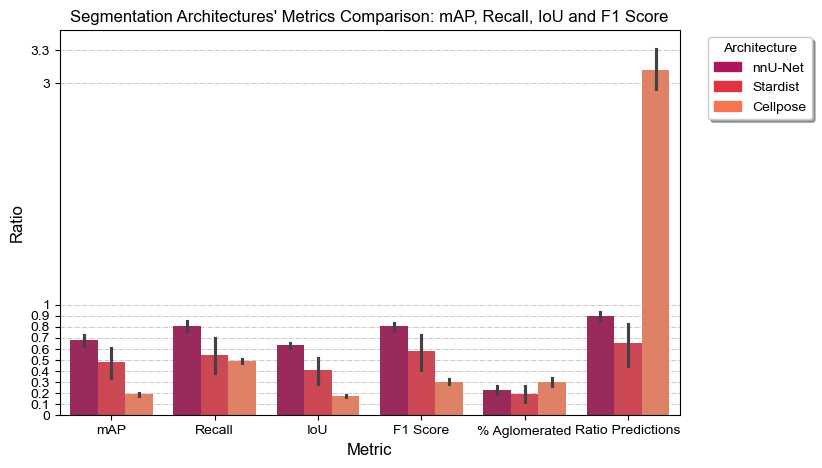

In [22]:
# Graphical ilustration of the performance comparison between the 3 architectures: nnU-Net, Stardist and Cellpose

fig, ax = plt.subplots(figsize=(8,5))
ax.set_axisbelow(True)
plt.grid(visible=True, which='both', axis='y', linestyle='-.', linewidth=0.5, zorder= -1, ds='steps-mid')

## Variables
metrics = ["map", "recall", "iou", "f1score", "perc aglomerated", "ratio"]
s = 0.27
shift = {'nnU-Net': -s, 'Stardist': 0, 'Cellpose': s}

## Plot the ratios
for x_pos, metric in enumerate(metrics):
    sns.barplot(data=df_architectures_0, x=x_pos, y=metric, hue="architecture", palette=bars_palette[2:], width=0.8, estimator='mean')
    # sns.boxplot(data=df_architectures_0, x=x_pos, y=metric, hue="architecture", width=0.8, palette='dark:gray', fill=None, gap=0.5, linewidth=1, showfliers=False)

# Create legends
custom_legend = [
    Patch(facecolor=bars_palette[2], edgecolor=bars_palette[2], label='nnU-Net'),
    Patch(facecolor=bars_palette[3], edgecolor=bars_palette[3], label='Stardist'),
    Patch(facecolor=bars_palette[4], edgecolor=bars_palette[4], label='Cellpose')
]
plt.legend(handles=custom_legend, loc='upper right', title="Architecture", fancybox=True, shadow=True, bbox_to_anchor=(1.225, 1))

## Titles and labels
plt.title("Segmentation Architectures' Metrics Comparison: mAP, Recall, IoU and F1 Score")
plt.xlabel("Metric")
ax.set_xlabel("Metric")
ax.set_ylabel("Ratio")
plt.xticks(ticks=np.arange(len(metrics)), labels=['mAP', 'Recall', 'IoU', 'F1 Score', "% Aglomerated", "Ratio Predictions"])
y_ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 3, 3.3]
ax.set_yticks(ticks=y_ticks,labels=list(y_ticks))

## Save and show graphic
plt.savefig('Images/SEG_architectures_ML_metrics.png', transparent=True)
plt.show()

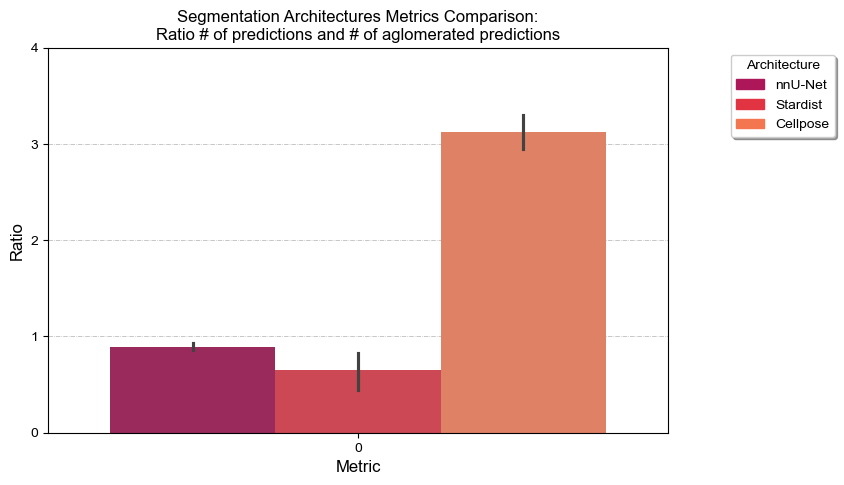

In [23]:
# Graphical ilustration of the performance comparison between the 3 architectures: nnU-Net, Stardist and Cellpose

fig, ax1 = plt.subplots(figsize=(8,5))
## ax2 = ax1.twinx()


ax1.set_ylim(0, 6)
## ax2.set_ylim(0, 54)
# ax1.figure.canvas.draw()    

# ax1.callbacks.connect("ylim_changed", convert_ax2) 

## ax2.set_axisbelow(True)
ax1.set_axisbelow(True)
ax1.grid(visible=True, which='both', axis='y', linestyle='-.', linewidth=0.5, zorder= -1, ds='steps-mid')

## Variables
metrics = ["ratio", "perc aglomerated"]
s = 0.27
shift = {'nnU-Net': -s, 'Stardist': 0, 'Cellpose': s}

## Plot the ratios
sns.barplot(data=df_architectures_0, x=0, y=metrics[0], hue="architecture", palette=bars_palette[2:], width=0.8, estimator='mean', legend=False, ax=ax1)
# sns.boxplot(data=df_architectures_0, x=0, y=metrics[0], hue="architecture", width=0.8, palette='dark:gray', fill=None, gap=0.5, linewidth=1, showfliers=False, legend=False, ax=ax1)


## sns.barplot(data=df_architectures_0, x=1, y=metrics[1], hue="architecture", palette=bars_palette[2:], width=0.8, estimator='mean', ax=ax2, legend=False)
# sns.boxplot(data=df_architectures_0, x=1, y=metrics[1], hue="architecture", width=0.8, palette='dark:gray', fill=None, gap=0.5, linewidth=1, showfliers=False, ax=ax2, legend=False)


# # Create legends
custom_legend = [
    Patch(facecolor=bars_palette[2], edgecolor=bars_palette[2], label='nnU-Net'),
    Patch(facecolor=bars_palette[3], edgecolor=bars_palette[3], label='Stardist'),
    Patch(facecolor=bars_palette[4], edgecolor=bars_palette[4], label='Cellpose')
]
ax1.legend(handles=custom_legend, loc='upper right', title="Architecture", fancybox=True, shadow=True, bbox_to_anchor=(1.28, 1))

## Titles and labels
plt.title("Segmentation Architectures Metrics Comparison:\nRatio # of predictions and # of aglomerated predictions")
plt.xlabel("Metric")
ax1.set_xlabel("Metric")
ax1.set_ylabel("Ratio")
## ax2.set_ylabel("Percentage")
## plt.xticks(ticks=np.arange(len(metrics)), labels=['Ratio # Predictions', '% Aglomerated Predictions'])
y2_ticks = np.arange(0,1.1,0.25)
## ax2.set_yticks(ticks=y2_ticks,labels=list(y2_ticks))
y_ticks = np.arange(0,8,1)
ax1.set_yticks(ticks=y_ticks,labels=list(y_ticks))
ax1.set_ylim((0,4))
## ax2.set_ylim((0,1))

## Save and show graphic
plt.savefig('Images/SEG_architectures_more_metrics.png', transparent=True)
plt.show()

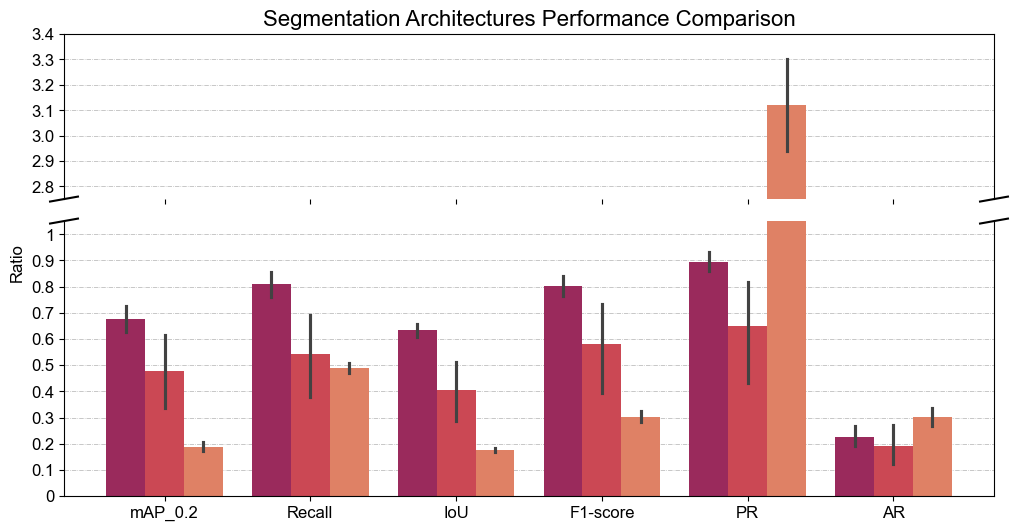

In [24]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch

# Mock dataframe for demonstration
# Replace df_architectures_0 with your actual data
# import pandas as pd
# df_architectures_0 = pd.DataFrame({
#     'metric': np.tile(["map", "recall", "iou", "f1score", "perc aglomerated", "ratio"], 3),
#     'architecture': np.repeat(['nnU-Net', 'Stardist', 'Cellpose'], 6),
#     'value': np.random.uniform(0, 3.5, 18)  # Random values for example
# })
# bars_palette = ['#4c72b0', '#55a868', '#c44e52']

# Create the subplots
metrics = ["map", "recall", "iou", "f1score", "ratio", "perc aglomerated"]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6), gridspec_kw={'height_ratios': [6, 10]})
fig.subplots_adjust(hspace=0.1)  # Adjust space between plots
ax1.grid(visible=True, which='both', axis='y', linestyle='-.', linewidth=0.5, zorder= -1, ds='steps-mid')
ax2.grid(visible=True, which='both', axis='y', linestyle='-.', linewidth=0.5, zorder= -1, ds='steps-mid')


# Plot for the upper range (2.7 to 3.3)
for x_pos, metric in enumerate(metrics):
    sns.barplot(
        data=df_architectures_0,
        x=x_pos,
        y=metric,
        hue='architecture',
        ax=ax2,
        palette=bars_palette[2:],
        width=0.8,
        legend=False, 
        zorder = 2
    )
ax2.set_ylim(0, 1.05)
y_ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
ax2.set_yticks(ticks=y_ticks,labels=list(y_ticks), fontsize=12)
ax2.spines['top'].set_visible(False)
# ax2.xaxis.tick_bottom()

# Plot for the lower range (0 to 1)
for x_pos, metric in enumerate(metrics):
    sns.barplot(
        data=df_architectures_0[df_architectures_0[metric] >= 1],
        x=x_pos,
        y=metric,
        hue='architecture',
        ax=ax1,
        palette=bars_palette[2:],
        width=0.8,
        legend=False,
        zorder = 2
    )
ax1.set_ylim(2.75, 3.4)
y_ticks = [2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4]
ax1.set_yticks(ticks=y_ticks,labels=list(y_ticks), fontsize=12)
ax1.spines['bottom'].set_visible(False)
ax1.set_xticks([],[])

# Add diagonal lines to indicate the break
d = .015  # Diagonal line length
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)  # Top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # Top-right diagonal

kwargs.update(transform=ax2.transAxes)  # Switch to the lower subplot
ax2.plot((-d, +d), (1 - d*0.6, 1 + d*0.6), **kwargs)  # Bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d*0.6, 1 + d*0.6), **kwargs)  # Bottom-right diagonal

# Custom legend
custom_legend = [
    Patch(facecolor=bars_palette[2], edgecolor=bars_palette[2], label='nnU-Net'),
    Patch(facecolor=bars_palette[3], edgecolor=bars_palette[3], label='Stardist'),
    Patch(facecolor=bars_palette[4], edgecolor=bars_palette[4], label='Cellstitch')
]
# fig.legend(
#     handles=custom_legend,
#     loc='upper right',
#     title="Architecture",
#     fancybox=True,
#     shadow=True,
#     bbox_to_anchor=(1, 0.9), fontsize=12 
# )

# # Titles and labels
# fig.suptitle("Segmentation Architectures' Metrics Comparison")
# ax2.set_xlabel("Metric")
fig.text(0.08, 0.5, 'Ratio', va='center', rotation='vertical', fontsize=12)

ax1.set_ylabel("")
ax2.set_ylabel("")
ax2.set_xticks(np.arange(6))
ax2.set_xticklabels(['mAP_0.2', 'Recall', 'IoU', 'F1-score', "PR", "AR"], fontsize=12)
ax1.set_title("Segmentation Architectures Performance Comparison", fontsize=16)

# Save and show graphic
plt.savefig('Images/SEG_architectures_ML_metrics.pdf', transparent=True)
plt.show()

In [25]:
df_architectures_0

,Unnamed: 0,architecture,dataset,fold,merge,name,ratio,recall,precision,map,iou,f1score,aglomerated,# GT,perc aglomerated
0,0,nnU-Net,Dataset001_ActinGFP,fold_4,0,INTRO_006,0.849057,0.750000,0.729730,0.586957,0.520816,0.739726,21,54,0.388889
1,1,nnU-Net,Dataset001_ActinGFP,fold_4,0,INTRO_003,0.950000,0.937500,0.882353,0.833333,0.685408,0.909091,4,21,0.190476
2,2,nnU-Net,Dataset001_ActinGFP,fold_4,0,INTRO_014,0.761194,0.604651,0.666667,0.464286,0.565610,0.634146,24,68,0.352941
3,3,nnU-Net,Dataset001_ActinGFP,fold_3,0,INTRO_010,0.835616,0.740741,0.769231,0.606061,0.593904,0.754717,19,74,0.256757
4,4,nnU-Net,Dataset001_ActinGFP,fold_3,0,INTRO_005,1.046512,0.942857,0.804878,0.767442,0.686291,0.868421,8,44,0.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,555,CellStitch,ActinGFP,cellstitch,0,image_007_nuclei3d,1.268657,0.711538,0.528571,0.435294,0.202807,0.606557,36,68,0.529412
556,556,CellStitch,ActinGFP,cellstitch,0,image_012_nuclei3d,1.685714,0.565217,0.386139,0.297710,0.134856,0.458824,45,71,0.633803
557,557,CellStitch,ActinGFP,cellstitch,0,image_016_nuclei3d,2.000000,0.533333,0.280702,0.225352,0.157025,0.367816,30,64,0.468750
558,558,CellStitch,ActinGFP,cellstitch,0,image_003_nuclei3d,2.200000,0.473684,0.236842,0.187500,0.143921,0.315789,12,21,0.571429


In [26]:
df_architectures_analysis_excALL[df_architectures_analysis_excALL['dataset'] == 'ActinGFP']

,Unnamed: 0,architecture,dataset,fold,merge,name,ratio,recall,precision,map,iou,f1score,aglomerated,# GT,perc aglomerated
341,341,Stardist,ActinGFP,fold_4,0,image_006_nuclei3d,1.000000,0.897436,0.897436,0.813953,0.513095,0.897436,32,54,0.592593
342,342,Stardist,ActinGFP,fold_4,0,image_003_nuclei3d,1.000000,0.842105,0.888889,0.761905,0.591029,0.864865,4,21,0.190476
343,343,Stardist,ActinGFP,fold_4,0,image_014_nuclei3d,0.865672,0.729167,0.795455,0.614035,0.558961,0.760870,29,68,0.426471
344,344,Stardist,ActinGFP,fold_3,0,image_010_nuclei3d,0.835616,0.655738,0.784314,0.555556,0.535074,0.714286,20,74,0.270270
345,345,Stardist,ActinGFP,fold_3,0,image_005_nuclei3d,0.906977,0.800000,0.888889,0.727273,0.659421,0.842105,6,44,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,555,CellStitch,ActinGFP,cellstitch,0,image_007_nuclei3d,1.268657,0.711538,0.528571,0.435294,0.202807,0.606557,36,68,0.529412
556,556,CellStitch,ActinGFP,cellstitch,0,image_012_nuclei3d,1.685714,0.565217,0.386139,0.297710,0.134856,0.458824,45,71,0.633803
557,557,CellStitch,ActinGFP,cellstitch,0,image_016_nuclei3d,2.000000,0.533333,0.280702,0.225352,0.157025,0.367816,30,64,0.468750
558,558,CellStitch,ActinGFP,cellstitch,0,image_003_nuclei3d,2.200000,0.473684,0.236842,0.187500,0.143921,0.315789,12,21,0.571429


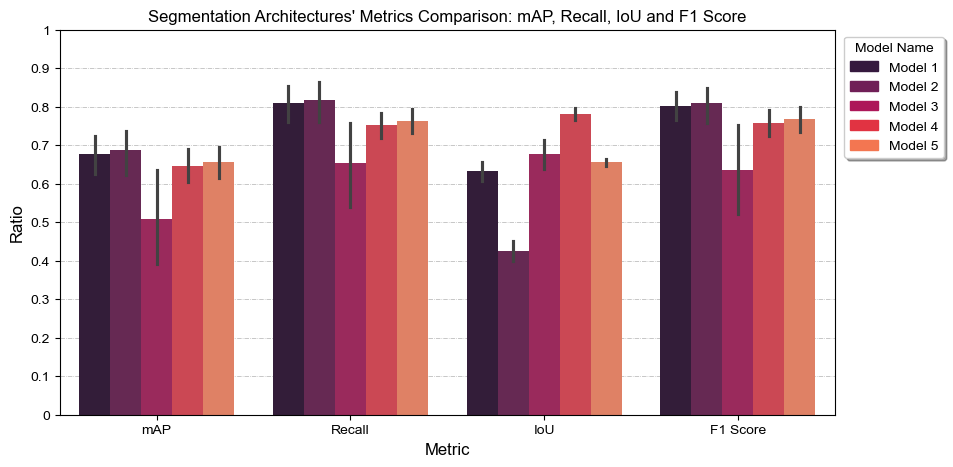

In [27]:
# Graphical ilustration of the performance comparison between nnU-Net training datasets

fig, ax = plt.subplots(figsize=(10,5))
ax.set_axisbelow(True)
plt.grid(visible=True, which='both', axis='y', linestyle='-.', linewidth=0.5, zorder= -1, ds='steps-mid')

## nnU-Net data filtering
df_nnUNet_analysis_excALL = df_architectures_analysis_excALL[df_architectures_analysis['architecture'] == 'nnU-Net']


## Variables
metrics = ["map", "recall", "iou", "f1score"]
s = 0.135
shift = {'001': -2*s, '002': -s, '003': 0, '004': s, '005': 2*s}

## Plot the ratios
for x_pos, metric in enumerate(metrics):
    sns.barplot(data=df_nnUNet_analysis_excALL, x=x_pos, y=metric, hue="dataset", palette=bars_palette, width=0.8, estimator='mean')
    # sns.boxplot(data=df_nnUNet_analysis_excALL, x=x_pos, y=metric, hue="dataset", width=0.8, palette='dark:gray', fill=None, gap=0.5, linewidth=1, showfliers=False)

# Create legends
custom_legend = [
    Patch(facecolor=bars_palette[0], edgecolor=bars_palette[0], label='Model 1'),
    Patch(facecolor=bars_palette[1], edgecolor=bars_palette[1], label='Model 2'),
    Patch(facecolor=bars_palette[2], edgecolor=bars_palette[2], label='Model 3'),
    Patch(facecolor=bars_palette[3], edgecolor=bars_palette[3], label='Model 4'),
    Patch(facecolor=bars_palette[4], edgecolor=bars_palette[4], label='Model 5')
]
plt.legend(handles=custom_legend, loc='upper right', title="Model Name", fancybox=True, shadow=True, bbox_to_anchor=(1.15, 1))

## Titles and labels
plt.title("Segmentation Architectures' Metrics Comparison: mAP, Recall, IoU and F1 Score")
plt.xlabel("Metric")
ax.set_xlabel("Metric")
ax.set_ylabel("Ratio")
plt.xticks(ticks=np.arange(len(metrics)), labels=['mAP', 'Recall', 'IoU', 'F1 Score'])
y_ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
ax.set_yticks(ticks=y_ticks,labels=list(y_ticks))

## Save and show graphic
plt.savefig('Images/SEG_nnUNet_ML_metrics.png', transparent=True)
plt.show()

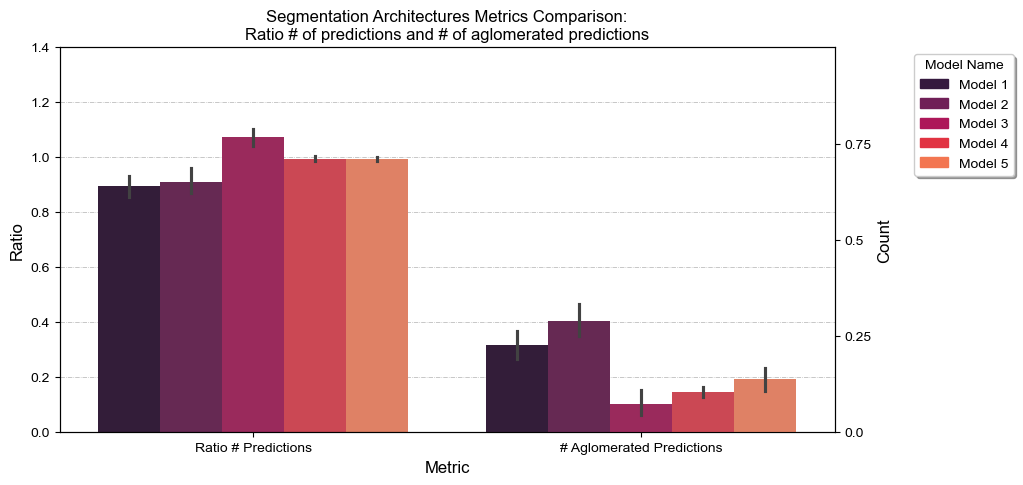

In [28]:
# Graphical ilustration of the performance comparison between nnU-Net training datasets

fig, ax1 = plt.subplots(figsize=(10,5))
ax2 = ax1.twinx()

ax1.set_ylim(0, 1)
ax2.set_ylim(0, 20)
# ax1.figure.canvas.draw()    

# ax1.callbacks.connect("ylim_changed", convert_ax2) 

ax2.set_axisbelow(True)
ax1.set_axisbelow(True)
ax1.grid(visible=True, which='both', axis='y', linestyle='-.', linewidth=0.5, zorder= -1, ds='steps-mid')

## Variables
metrics = ["ratio", "perc aglomerated"]
s = 0.135
shift = {'001': -2*s, '002': -s, '003': 0, '004': s, '005': 2*s}

## Plot the ratios
sns.barplot(data=df_nnUNet_analysis_excALL, x=0, y=metrics[0], hue="dataset", palette=bars_palette, width=0.8, estimator='mean', legend=False, ax=ax1)
# sns.boxplot(data=df_nnUNet_analysis_excALL, x=0, y=metrics[0], hue="dataset", width=0.8, palette='dark:gray', fill=None, gap=0.5, linewidth=1, showfliers=False, legend=False, ax=ax1)


sns.barplot(data=df_nnUNet_analysis_excALL, x=1, y=metrics[1], hue="dataset", palette=bars_palette, width=0.8, estimator='mean', ax=ax2, legend=False)
# sns.boxplot(data=df_nnUNet_analysis_excALL, x=1, y=metrics[1], hue="dataset", width=0.8, palette='dark:gray', fill=None, gap=0.5, linewidth=1, showfliers=False, ax=ax2, legend=False)


# # Create legends
custom_legend = [
    Patch(facecolor=bars_palette[0], edgecolor=bars_palette[0], label='Model 1'),
    Patch(facecolor=bars_palette[1], edgecolor=bars_palette[1], label='Model 2'),
    Patch(facecolor=bars_palette[2], edgecolor=bars_palette[2], label='Model 3'),
    Patch(facecolor=bars_palette[3], edgecolor=bars_palette[3], label='Model 4'),
    Patch(facecolor=bars_palette[4], edgecolor=bars_palette[4], label='Model 5')
]
plt.legend(handles=custom_legend, loc='upper right', title="Model Name", fancybox=True, shadow=True, bbox_to_anchor=(1.24, 1))

## Titles and labels
plt.title("Segmentation Architectures Metrics Comparison:\nRatio # of predictions and # of aglomerated predictions")
plt.xlabel("Metric")
ax1.set_xlabel("Metric")
ax1.set_ylabel("Ratio")
ax2.set_ylabel("Count")
plt.xticks(ticks=np.arange(len(metrics)), labels=['Ratio # Predictions', '# Aglomerated Predictions'])
y2_ticks = np.arange(0,1,0.25)
ax2.set_yticks(ticks=y2_ticks,labels=list(y2_ticks))
y_ticks = np.round(np.arange(0,1.5,0.2),2)
ax1.set_yticks(ticks=y_ticks,labels=list(y_ticks))
ax2.set_ylim((0,1))

## Save and show graphic
plt.savefig('Images/SEG_nnUNet_more_metrics.png', transparent=True)
plt.show()

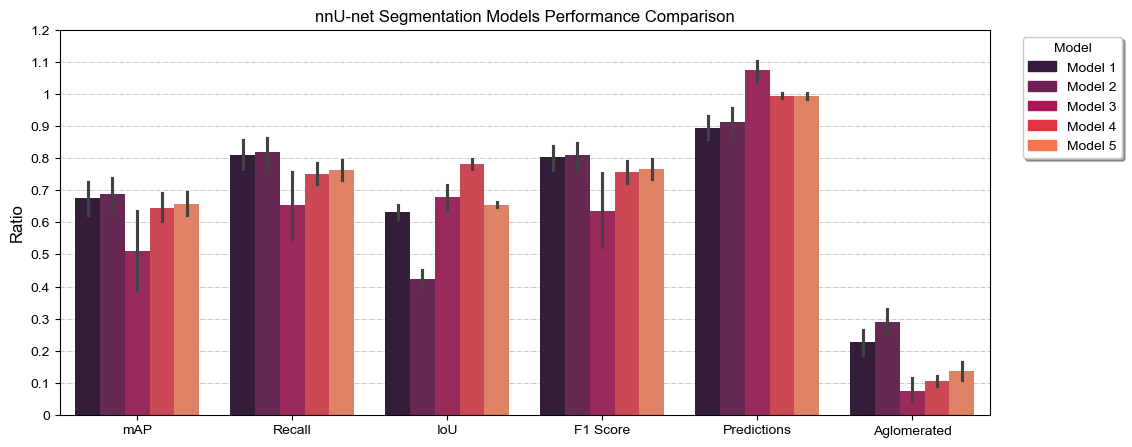

In [29]:
# Graphical ilustration of the performance comparison between nnU-Net training datasets

fig, ax = plt.subplots(figsize=(12,5))
ax.set_axisbelow(True)
plt.grid(visible=True, which='both', axis='y', linestyle='-.', linewidth=0.5, zorder= -1, ds='steps-mid')

## nnU-Net data filtering
df_nnUNet_analysis_excALL = df_architectures_analysis_excALL[df_architectures_analysis['architecture'] == 'nnU-Net']


## Variables
metrics = ["map", "recall", "iou", "f1score", "ratio", "perc aglomerated"]
s = 0.135
shift = {'001': -2*s, '002': -s, '003': 0, '004': s, '005': 2*s}

## Plot the ratios
for x_pos, metric in enumerate(metrics):
    sns.barplot(data=df_nnUNet_analysis_excALL, x=x_pos, y=metric, hue="dataset", palette=bars_palette, width=0.8, estimator='mean')
    # sns.boxplot(data=df_nnUNet_analysis_excALL, x=x_pos, y=metric, hue="dataset", width=0.8, palette='dark:gray', fill=None, gap=0.5, linewidth=1, showfliers=False)

# Create legends
custom_legend = [
    Patch(facecolor=bars_palette[0], edgecolor=bars_palette[0], label='Model 1'),
    Patch(facecolor=bars_palette[1], edgecolor=bars_palette[1], label='Model 2'),
    Patch(facecolor=bars_palette[2], edgecolor=bars_palette[2], label='Model 3'),
    Patch(facecolor=bars_palette[3], edgecolor=bars_palette[3], label='Model 4'),
    Patch(facecolor=bars_palette[4], edgecolor=bars_palette[4], label='Model 5')
]
plt.legend(handles=custom_legend, loc='upper right', title="Model", fancybox=True, shadow=True, bbox_to_anchor=(1.15, 1))

## Titles and labels
plt.title("nnU-net Segmentation Models Performance Comparison")
ax.set_ylabel("Ratio")
plt.xticks(ticks=np.arange(len(metrics)), labels=['mAP', 'Recall', 'IoU', 'F1 Score', 'Predictions', 'Aglomerated'])
y_ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2]
ax.set_yticks(ticks=y_ticks,labels=list(y_ticks))

## Save and show graphic
plt.savefig('Images/SEG_nnUNet_ML_metrics.pdf', transparent=True)
plt.show()

In [30]:
df_nnUNet_analysis_excALL.groupby("dataset").mean(numeric_only=True).apply(lambda x:x)


,Unnamed: 0,merge,ratio,recall,precision,map,iou,f1score,aglomerated,# GT,perc aglomerated
dataset,,,,,,,,,,,
Dataset001_ActinGFP,14.5,0.0,0.894076,0.808968,0.799202,0.677148,0.633444,0.803042,12.625000,54.812500,0.226504
Dataset002_ActinGFP,46.5,0.0,0.911622,0.818679,0.800944,0.687716,0.424040,0.808715,16.250000,54.812500,0.288966
Dataset003_DAPI,71.5,0.0,1.073570,0.653702,0.618972,0.509342,0.677930,0.635367,4.812500,54.812500,0.074755
Dataset004_Augmented,139.5,0.0,0.995231,0.751421,0.765428,0.645798,0.782306,0.757980,6.291667,53.366667,0.104793
Dataset005_Zoomed,270.0,0.0,0.994471,0.763514,0.771942,0.657337,0.655583,0.767499,4.085106,65.113475,0.137477


In [31]:
import pandas as pd
from scipy.stats import sem, t

# Assuming df_architectures_analysis_excALL is your DataFrame
# Replace it with your actual DataFrame name

confidence = 0.95

# Function to calculate margin of error for 95% CI
def ci_95(series):
    n = series.count()  # Number of non-NA values
    if n > 1:  # Only calculate if there is enough data
        std_err = sem(series, nan_policy="omit")  # Standard error of the mean
        t_value = t.ppf((1 + confidence) / 2, n - 1)  # t-critical value
        return t_value * std_err  # Margin of error
    else:
        return None  # Not enough data

# Group by "architecture" and calculate 95% CI for numeric columns
ci_95_results = df_nnUNet_analysis_excALL.groupby("dataset").apply(
    lambda group: group.select_dtypes(include="number").apply(ci_95)
)

print(ci_95_results*100)

                      Unnamed: 0  merge     ratio     recall  precision  \
dataset                                                                   
Dataset001_ActinGFP   667.816398    0.0  4.056849   5.175109   3.469368   
Dataset002_ActinGFP   667.816398    0.0  5.213060   6.025228   4.540196   
Dataset003_DAPI       253.693240    0.0  3.639656  12.656473  13.141614   
Dataset004_Augmented  628.766158    0.0  0.940759   3.408378   3.509541   
Dataset005_Zoomed     680.098817    0.0  0.826687   3.170331   3.178101   

                            map       iou    f1score  aglomerated  \
dataset                                                             
Dataset001_ActinGFP    5.569096  2.684349   4.074598   328.406393   
Dataset002_ActinGFP    6.314888  2.866768   5.095565   400.415740   
Dataset003_DAPI       14.139847  4.390718  12.905391   281.439296   
Dataset004_Augmented   4.256764  1.567272   3.449372   102.744693   
Dataset005_Zoomed      3.806334  0.889938   3.169596    72.3

In [32]:
data = df_nnUNet_analysis_excALL.groupby("dataset")[['ratio',	'recall', 'precision', 'map', 'iou', 'f1score', 'perc aglomerated']].apply(lambda x:x)

In [33]:
data

ratio    recall  precision       map       iou  \
dataset                                                                      
Dataset001_ActinGFP 0    0.849057  0.750000   0.729730  0.586957  0.520816   
                    1    0.950000  0.937500   0.882353  0.833333  0.685408   
                    2    0.761194  0.604651   0.666667  0.464286  0.565610   
                    3    0.835616  0.740741   0.769231  0.606061  0.593904   
                    4    1.046512  0.942857   0.804878  0.767442  0.686291   
...                           ...       ...        ...       ...       ...   
Dataset005_Zoomed   336  1.000000  0.833333   0.769231  0.666667  0.589449   
                    337  1.000000  1.000000   1.000000  1.000000  0.685974   
                    338  0.909091  0.409091   0.450000  0.272727  0.682637   
                    339  1.053571  0.807018   0.779661  0.657143  0.675060   
                    340  0.979695  0.869792   0.878947  0.776744  0.723251   

                          f1score  perc aglomerated  
dataset                                              
Dataset001_ActinGFP 0    0.739726          0.388889  
                    1    0.909091          0.190476  
                    2    0.634146          0.352941  
                    3    0.754717          0.256757  
                    4    0.868421          0.181818  
...                           ...               ...  
Dataset005_Zoomed   336  0.800000          0.031250  
                    337  1.000000          0.000000  
                    338  0.428571          0.000000  
                    339  0.793103          0.000000  
                    340  0.874346          0.285714  

[309 rows x 7 columns]

In [46]:
ds1 = df_nnUNet_analysis_excALL[df_nnUNet_analysis_excALL["dataset"] == "Dataset004_Augmented"].groupby('fold').mean(numeric_only=True).apply(lambda x:x)[['recall', 'precision', 'map', 'iou', 'f1score', 'ratio', 'perc aglomerated']]
ds2 = df_nnUNet_analysis_excALL[df_nnUNet_analysis_excALL["dataset"] == "Dataset005_Zoomed"].groupby('fold').mean(numeric_only=True).apply(lambda x:x)[['recall', 'precision', 'map', 'iou', 'f1score', 'ratio', 'perc aglomerated']]

In [47]:
ds1

,recall,precision,map,iou,f1score,ratio,perc aglomerated
fold,,,,,,,
fold_0,0.732444,0.747727,0.630755,0.762899,0.739718,0.987902,0.121217
fold_1,0.729239,0.753761,0.630015,0.786510,0.741011,0.983539,0.093212
fold_2,0.774875,0.775387,0.652373,0.786685,0.774682,1.010237,0.107585
fold_3,0.727676,0.736953,0.618324,0.784715,0.731887,1.000393,0.094655
fold_4,0.792871,0.813312,0.697525,0.790724,0.802600,0.994084,0.107295


In [34]:
df_nnUNet_analysis_excALL["dataset"].unique()

array(['Dataset001_ActinGFP', 'Dataset002_ActinGFP', 'Dataset003_DAPI',
       'Dataset004_Augmented', 'Dataset005_Zoomed'], dtype=object)

[[3. 6. 6. 4. 4. 0. 1.]
 [3. 6. 7. 0. 5. 0. 0.]
 [3. 0. 0. 3. 1. 0. 0.]
 [6. 6. 5. 0. 6. 6. 1.]]


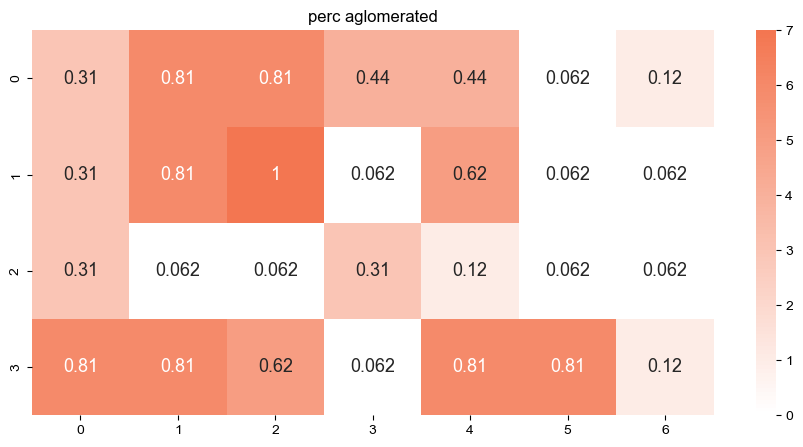

In [ ]:
from scipy.stats import wilcoxon

heatmap_palette = sns.color_palette(sns.blend_palette([white, bars_palette[4]], n_colors=100))

metrics = ['recall', 'precision', 'map', 'iou', 'f1score', 'ratio', 'perc aglomerated']
ds5 = 'Dataset005_Zoomed'

datasets = ['Dataset001_ActinGFP', 'Dataset002_ActinGFP', 'Dataset003_DAPI', 'Dataset004_Augmented']

wilc = np.zeros(shape= (len(datasets), len(metrics)))
pvalue = np.zeros(shape= (len(datasets), len(metrics)))

for m, metric in enumerate(metrics):
    w5 = df_nnUNet_analysis_excALL[df_nnUNet_analysis_excALL["dataset"] == ds5].groupby('fold').mean(numeric_only=True).apply(lambda x:x)[metric]

    for d, dataset in enumerate(datasets): 
        wi = df_nnUNet_analysis_excALL[df_nnUNet_analysis_excALL["dataset"] == dataset].groupby('fold').mean(numeric_only=True).apply(lambda x:x)[metric]
        
        stat, p = wilcoxon(wi, w5)

        wilc[d, m] = stat
        pvalue[d, m] = p

wilc, pvalue

plt.figure(figsize=(11,5))

sns.heatmap(wilc, cmap=heatmap_palette, annot=pvalue, annot_kws={"size":13})
plt.title(metric)
print(wilc)
plt.savefig(f"Images/wilcoxon.pdf", transparent=True)
plt.show()
    

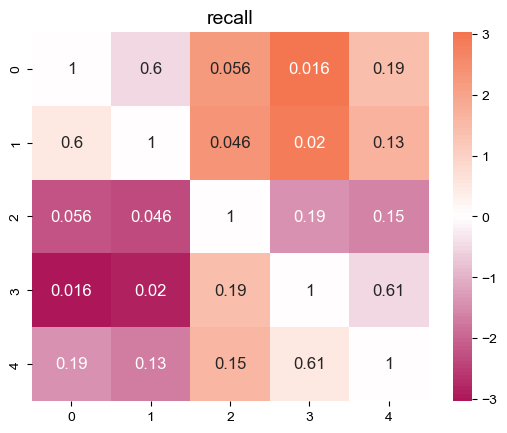

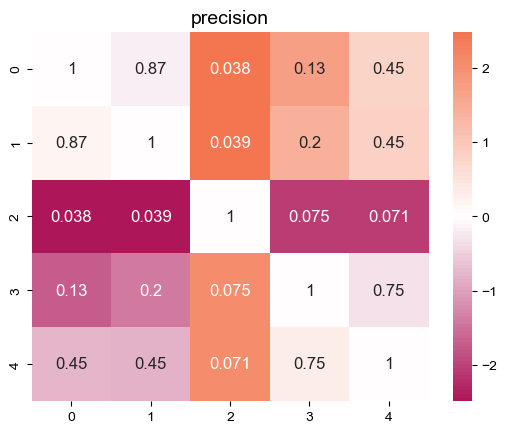

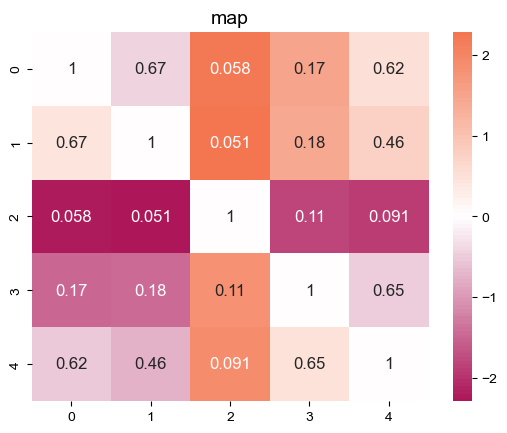

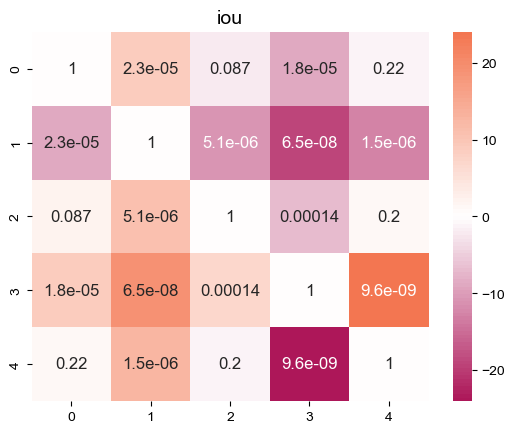

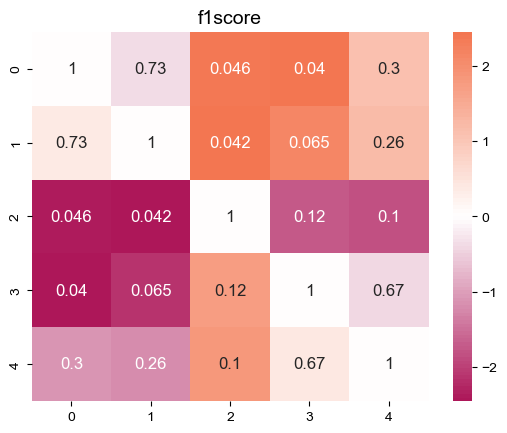

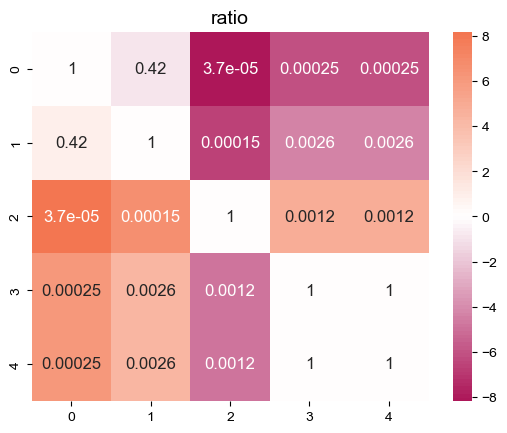

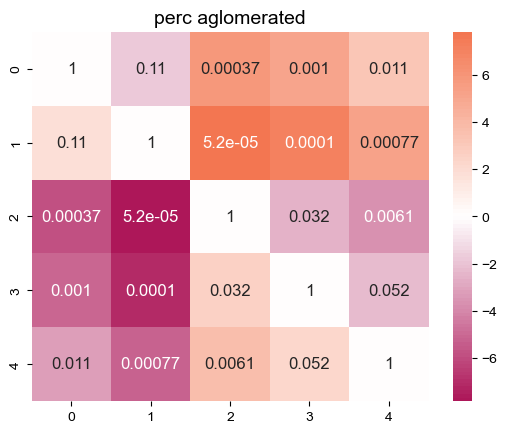

In [39]:
from scipy.stats import ttest_rel, ttest_ind

heatmap_palette = sns.color_palette(sns.blend_palette([bars_palette[2], white, bars_palette[4]], n_colors=100))

metrics = ['recall', 'precision', 'map', 'iou', 'f1score', 'ratio', 'perc aglomerated']
datasets = df_nnUNet_analysis_excALL["dataset"].unique()

for metric in metrics:
    ds = np.zeros(shape= (len(datasets), 5))

    for d, dataset in enumerate(datasets):
        ds[d,:] = df_nnUNet_analysis_excALL[df_nnUNet_analysis_excALL["dataset"] == dataset].groupby('fold').mean(numeric_only=True).apply(lambda x:x)[metric]
    
    ttest = np.zeros(shape= (len(datasets), len(datasets)))
    pvalue = np.zeros(shape= (len(datasets), len(datasets)))

    for i, r1 in enumerate(ds):
        for j, r2 in enumerate(ds):
            stat, p = ttest_ind(r1, r2)
            ttest[i, j] = stat
            pvalue[i, j] = p

    sns.heatmap(ttest, cmap=heatmap_palette, annot=pvalue, annot_kws={"size":12})
    plt.title(metric)
    # print(ttest)
    plt.savefig(f"Images/{metric}.pdf", transparent=True)
    plt.show()
    

In [ ]:
from scipy.stats import ttest_rel, ttest_ind

heatmap_palette = sns.color_palette(sns.blend_palette([bars_palette[2], white, bars_palette[4]], n_colors=100))

metrics = ['recall', 'precision', 'map', 'iou', 'f1score', 'ratio', 'perc aglomerated']
datasets = df_nnUNet_analysis_excALL["dataset"].unique()

for metric in metrics:
    ds = np.zeros(shape= (len(datasets), 5))

    for d, dataset in enumerate(datasets):
        ds[d,:] = df_nnUNet_analysis_excALL[df_nnUNet_analysis_excALL["dataset"] == dataset].groupby('fold').mean(numeric_only=True).apply(lambda x:x)[metric]
    
    ttest = np.zeros(shape= (len(datasets)-1))
    pvalue = np.zeros(shape= (len(datasets)-1))

    i=0
    while(i < len(ds) -1):
        stat, p = ttest_ind(r1, ds[4,:])
        ttest[i] = stat
        pvalue[i] = p
        i+=1

    print(ttest, pvalue)

    sns.heatmap(ttest, cmap=heatmap_palette, annot=pvalue, annot_kws={"size":10})
    plt.title(metric)
    # print(ttest)
    plt.show()
    

In [47]:
ds1['ratio'].values

array([0.8813501 , 0.87838585, 0.93301812, 0.92845129, 0.85341688])

In [61]:
from scipy.stats import wilcoxon

wilcoxon(ds1, ds2)

WilcoxonResult(statistic=array([4., 1., 3., 0., 2., 0., 1.]), pvalue=array([0.4375, 0.125 , 0.3125, 0.0625, 0.1875, 0.0625, 0.125 ]))

# Nuclei Statistics

TO DO

In [ ]:
original_images = "/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/datasets/Introduction__GFAP_DAPI/originals"

analysis_df = pd.DataFrame(columns=['architecture', 'dataset', 'fold', 'name', 'GTmean', 'GTstd', 'Predmean', 'Predstd'])

datasets_paths = []

for sett in architectures_analysis_paths:
    architecture = sett.split('/')[8]

    for ana in glob(sett):
        fold = ana.split('/')[-2]

        with open(ana, 'rb') as f:
            data = pickle.load(f)

            image_name = os.path.basename(ana).split('.')[0]
            
            print(f"{original_images}/{image_name}.tif")

            image = getData(f"{original_images}/{image_name}.tif")
            metadata = getMetadata(f"{original_images}/{image_name}.tif", image)

            voxel_size = np.prod(metadata['scale'])


            name = data['name']
            dataset = data['dataset']

            gt_properties = data['groudtruth_properties']['properties']
            pred_properties = data['prediction_properties']['properties']

            gt_area = data['groudtruth_properties']['properties']['area']*voxel_size
            pred_area = data['prediction_properties']['properties']['area']*voxel_size


            analysis_df.loc[len(analysis_df)] = [architecture, dataset, fold, name, gt_area.mean(), gt_area.std(), 
                                                 pred_area.mean(), pred_area.std()]

display(analysis_df)

In [ ]:
import seaborn as sns
sns.set_palette("rocket")

data = analysis_df

fig, axs = plt.subplots(1, 5, figsize=(20,6))
fig.suptitle("Performance comparison", fontsize=16)

sns.barplot(data=data, x='architecture', y='GTmean', hue = 'architecture', ax=axs[0])
axs[0].set_title("GTmean")

sns.barplot(data=data, x='architecture', y='GTstd', hue = 'architecture', ax=axs[1])
axs[1].set_title("GTstd")

sns.barplot(data=data, x='architecture', y='Predmean', hue = 'architecture', ax=axs[2])
axs[2].set_title("Predmean")

sns.barplot(data=data, x='architecture', y='Predstd', hue = 'architecture', ax=axs[3])
axs[3].set_title("Predstd")

fig.tight_layout()

plt.show()